In [2]:
#Reads comments from all json files, and prints out how many negative comments there were 
def read_comments_from_json2(filename, name):
    comments=[]
    commentCount = 0
    with io.open(filename) as f:
        data=json.load(f)
        for comment in data:
            #Adds only the textDisplay for each comment        
            comments.append(comment["snippet"]["topLevelComment"]["snippet"]["textDisplay"])
            commentCount = commentCount + 1
    negativeCount = 0
    newArray = predict_prob(comments)
    for everyNumber in newArray:
        if (everyNumber > 0.5):
            negativeCount = negativeCount + 1
    print (name + ": ", commentCount, negativeCount, negativeCount/commentCount)
    return comments 

In [3]:
import nltk, re, json, io #how to download NLTK, see https://www.nltk.org/data.html 

  #BATTLE ROYALE
  #Fortnite = '2gUtfBmw86Y' 
  #ApexLegends = 'G9xpYNGRxbE'  
  #Blackout = 'TktjCqG4p7Y' 
  #Firestorm = 'y-JB-O8A-TA' 

  #SPORTS
  #Rocket League = 'weV-WToHdhY' 
  #FIFA 15 = 'TnTYVT6lwBc' 
  #Madden 19 = '0VbE2yafP5I' 
  #Nhl15 = 'ZKcHuHmfMeE'
    
  #FPS
  #titanfall = 'z5sqPxbLmIU' 
  #destiny 2 = 'ZJLAJVmggt0'
  #far cry 3 = 'J6gnOVJsCsM' 
  #doom = 'RO90omga8D4'

  #SINGLE PLAYER
  #Skyrim = 'PjqsYzBrP-M' 
  #Fallout 4 = 'GE2BkLqMef4'
  #GTA 5 = 'VjZ5tgjPVfU' 
  #Assassins Creed 3 = '-pUhraVG7Ow'

#Creates list of all comments from channel ids above
fortnite_comments = read_comments_from_json2('fortniteComments.json', "Fortnite") 
apex_Comments = read_comments_from_json2('apexComments.json', "Apex Legends") 
blackout_comments = read_comments_from_json2('blackoutComments.json', "Blackout") 
firestorm_comments = read_comments_from_json2('firestormComments.json', 'Firestorm') 

rocketLeague_comments = read_comments_from_json2('rocketLeagueComments.json', 'Rocket League')
fifa15_comments = read_comments_from_json2('fifaComments.json', 'FIFA') 
madden19_comments = read_comments_from_json2('madden19Comments.json', 'Madden 19') 
nhl15_comments = read_comments_from_json2('nhl15Comments.json', 'NHL 15')

titanfall_comments = read_comments_from_json2('titanfallComments.json', 'Titanfall') 
destiny2_comments = read_comments_from_json2('destiny2Comments.json', 'Destiny 2') 
farcry3_comments = read_comments_from_json2('farcry3Comments.json', 'Far Cry') 
doom_comments = read_comments_from_json2('doomComments.json', 'Doom') 

skyrim_comments = read_comments_from_json2('skyrimComments.json', 'Skyrim')
fallout4_comments = read_comments_from_json2('fallout4Comments.json', 'Fallout 4')
gta5_comments = read_comments_from_json2('gta5Comments.json', 'GTA5')
assassinsCreed3_comments = read_comments_from_json2('assassins4Comments.json', 'Assassins Creed 3')

FileNotFoundError: [Errno 2] No such file or directory: 'fortniteComments.json'

In [182]:
import operator 
import json
import re
from collections import Counter
from sklearn import preprocessing
 
#Preprocesses Everything    
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [183]:
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

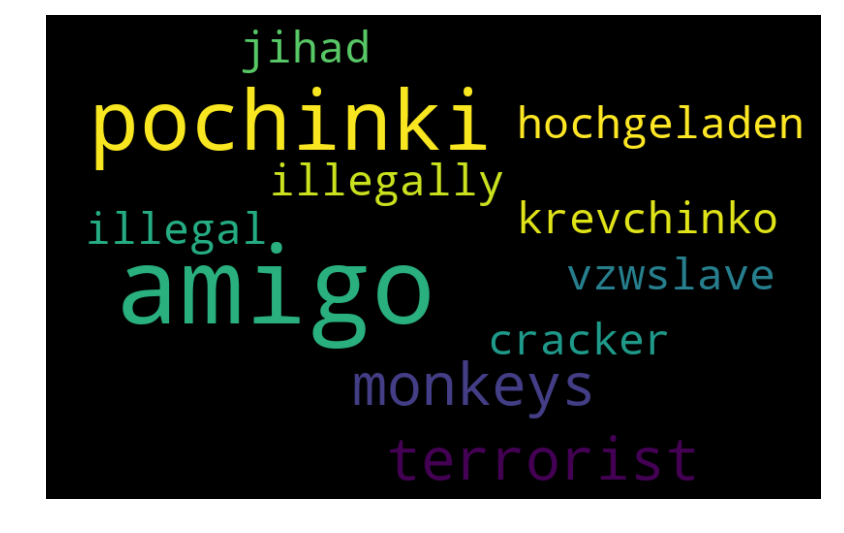

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of battle royale genres racist terms found
battleRoyale_racist = racistComments_Fornite + racistComments_Apex + racistComments_Blackout + racistComments_Firestorm

all_words = ' '.join([text for text in battleRoyale_racist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

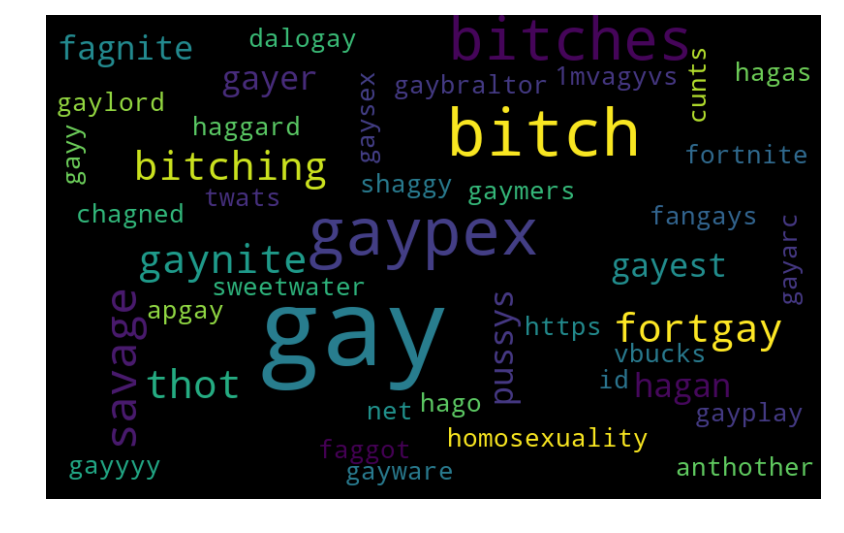

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of battle royale genres sexist terms found
battleRoyale_sexist = sexistComments_Fornite + sexistComments_Apex + sexistComments_Blackout + sexistComments_Firestorm

all_words = ' '.join([text for text in battleRoyale_sexist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

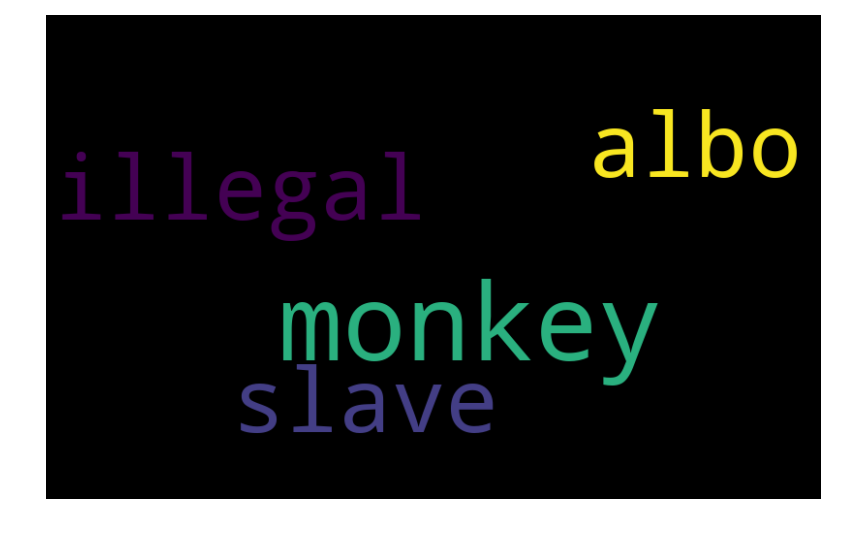

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of sports genres racist terms found
sports_racist = racistComments_RocketLeague + racistComments_Fifa + racistComments_madden + racistComments_nhl15

all_words = ' '.join([text for text in sports_racist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

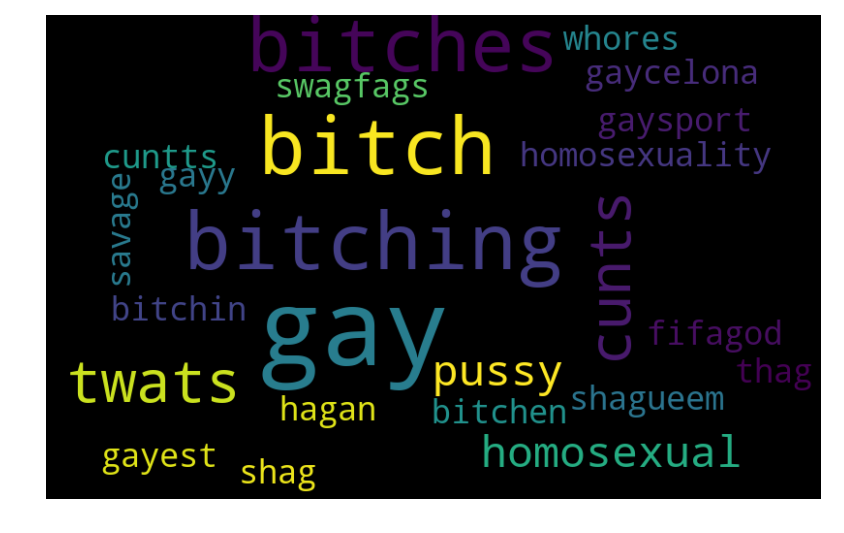

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of sports genres sexist terms found
sports_sexist = sexistComments_RocketLeague + sexistComments_Fifa + sexistComments_madden + sexistComments_nhl15

all_words = ' '.join([text for text in sports_sexist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

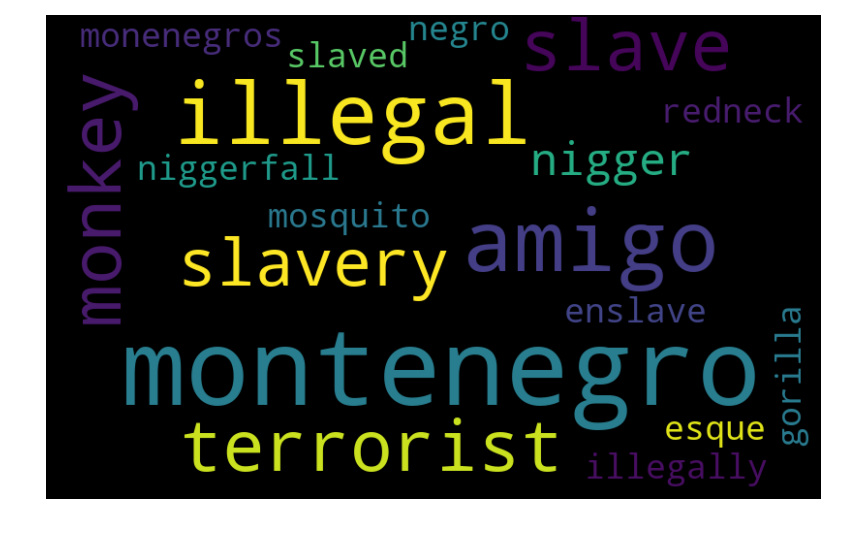

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of first person shooter genres racist terms found
fps_racist = racistComments_Titanfall + racistComments_Destiny2 + racistComments_farcry3 + racistComments_Doom

all_words = ' '.join([text for text in fps_racist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

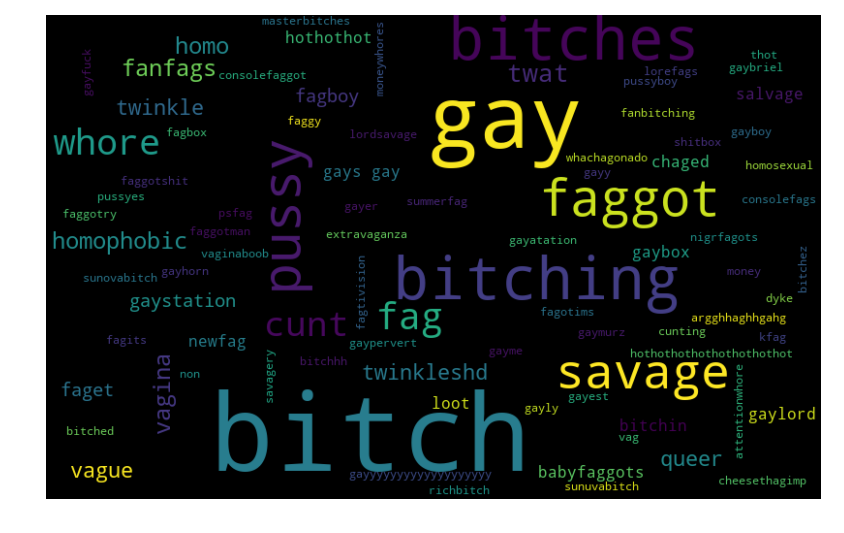

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of first person shooters genres sexist terms found
fps_sexist = sexistComments_Titanfall + sexistComments_Destiny2 + sexistComments_farcry3 + sexistComments_Doom

all_words = ' '.join([text for text in fps_sexist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

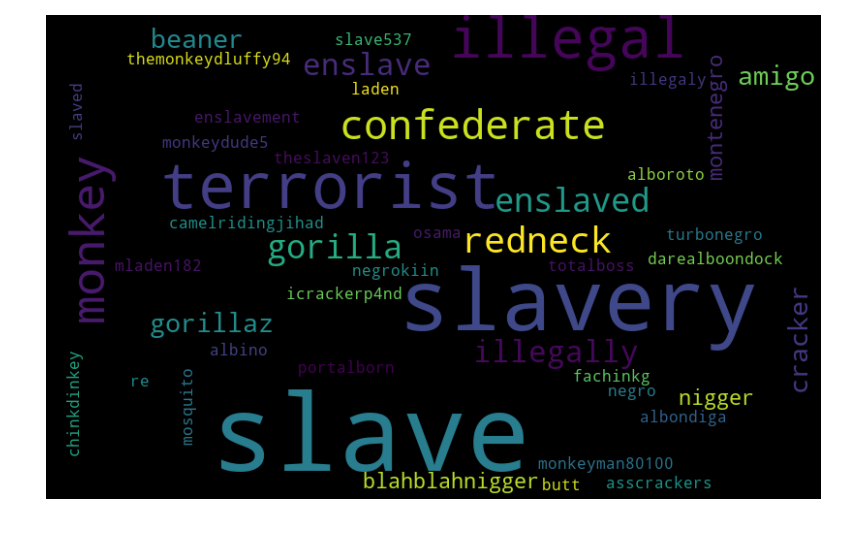

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of single player genres racist terms found
singlePlayer_racist = racistComments_Skyrim + racistComments_Fallout4 + racistComments_GTA5 + racistComments_AssassinsCreed3

all_words = ' '.join([text for text in singlePlayer_racist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

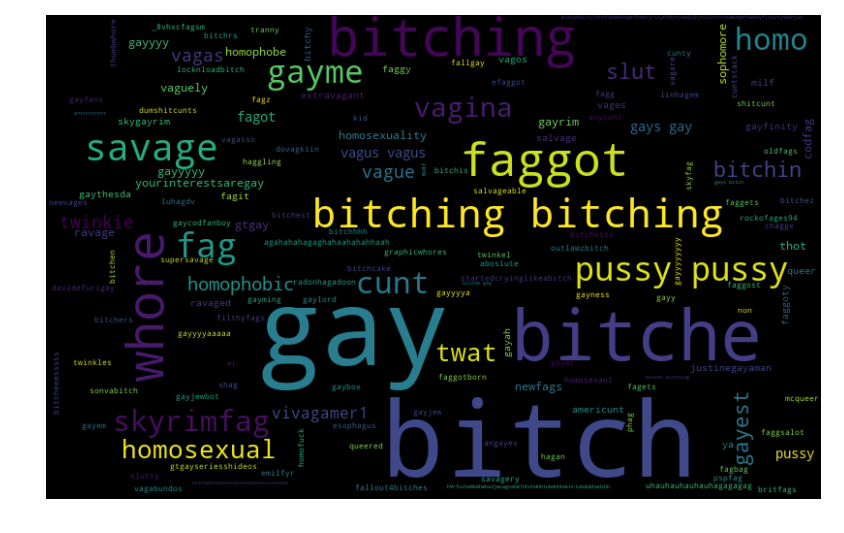

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#Creates word map of single player genres sexist terms found
singlePlayer_sexist = sexistComments_Skyrim + sexistComments_Fallout4 + sexistComments_GTA5 + sexistComments_AssassinsCreed3

all_words = ' '.join([text for text in singlePlayer_sexist])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [185]:

##Includes sexual orientation and sexist terms
sexist_slurs = ['hag', 'pussy', 'bitch', 'cunt', 'golddigger', 'milf',       
                'tranny', 'bimbo','slut', 'whore', 'vag', 'vagina',
               'fag', 'faggit', 'dyke', 'queer', 'twink', 
               'gay', 'homo', 'lesbo', 'twat', 'thot']

##Focus on muslims, blacks, asians, hispanics, whites
racist_slurs = ['head-bangers', 'mosquito', 'mozzie',
               'clicker', 'albo', 'baboon', 'blackie', 'nigg'
               'brownie', 'clicky', 'darkie', 'negro', 'nigger',
               'nigglet', 'slave', 'ching-chong', 'chink', 'dog-eater',
               'egghead', 'zipperhead', 'amigo', 'beaner', 'chunga',
               '7-11', 'laden', 'jihad', 'osama', 'sandies', 'terrorist',
               'towel-head', 'illegal', 'albino', 'confederate', 'cracker',
               'redneck', 'whitetrash', 'monkey', 'gorilla']



In [186]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Fornite = []
sexistComments_Fornite = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in fortnite_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Fornite.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Fornite.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  54
Racist Count:  9
Total Count:  190001


In [187]:
from profanity_check import predict, predict_prob

In [189]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Apex = []
sexistComments_Apex = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in apex_Comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Apex.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Apex.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  38
Racist Count:  3
Total Count:  106763


In [190]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Blackout = []
sexistComments_Blackout = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in blackout_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Blackout.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Blackout.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  15
Racist Count:  7
Total Count:  132100


In [192]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Firestorm = []
sexistComments_Firestorm = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in firestorm_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Firestorm.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Firestorm.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  9
Racist Count:  6
Total Count:  61083


In [193]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_RocketLeague = []
sexistComments_RocketLeague = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in rocketLeague_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_RocketLeague.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_RocketLeague.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  5
Racist Count:  0
Total Count:  22990


In [195]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Fifa = []
sexistComments_Fifa = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in fifa15_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Fifa.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Fifa.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  45
Racist Count:  5
Total Count:  91451


In [196]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_madden = []
sexistComments_madden = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in madden19_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_madden.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_madden.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  7
Racist Count:  2
Total Count:  42898


In [198]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_nhl15 = []
sexistComments_nhl15 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in nhl15_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_nhl15.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_nhl15.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  11
Racist Count:  2
Total Count:  32259


In [199]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Titanfall = []
sexistComments_Titanfall = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in titanfall_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Titanfall.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Titanfall.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  209
Racist Count:  6
Total Count:  285206


In [200]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Destiny2 = []
sexistComments_Destiny2 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in destiny2_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Destiny2.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Destiny2.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  160
Racist Count:  7
Total Count:  286274


In [201]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_farcry3 = []
sexistComments_farcry3 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in farcry3_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_farcry3.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_farcry3.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  244
Racist Count:  54
Total Count:  200311


In [202]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Doom = []
sexistComments_Doom = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in doom_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Doom.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Doom.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  24
Racist Count:  0
Total Count:  40901


In [203]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Skyrim = []
sexistComments_Skyrim = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in skyrim_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Skyrim.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Skyrim.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  506
Racist Count:  23
Total Count:  481379


In [205]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Fallout4 = []
sexistComments_Fallout4 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in fallout4_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Fallout4.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Fallout4.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  351
Racist Count:  26
Total Count:  589882


In [206]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_GTA5 = []
sexistComments_GTA5 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in gta5_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_GTA5.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_GTA5.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  292
Racist Count:  33
Total Count:  293109


In [207]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_AssassinsCreed3 = []
sexistComments_AssassinsCreed3 = []
countSexist = 0
countRacist = 0
countTotal = 0
for line in assassinsCreed3_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_AssassinsCreed3.append(word.lower())
                countSexist = countSexist + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_AssassinsCreed3.append(word.lower())
                countRacist = countRacist + 1
        countTotal = countTotal + 1
print ("Sexist Count: ", countSexist)
print ("Racist Count: ", countRacist)
print ("Total Count: ", countTotal)

Sexist Count:  320
Racist Count:  153
Total Count:  434015


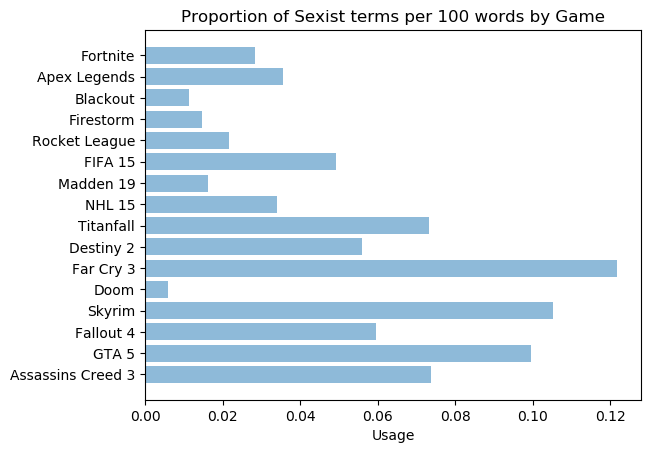

In [224]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
#Titles of the games
objects = ('Assassins Creed 3','GTA 5','Fallout 4',
          'Skyrim', 'Doom', 'Far Cry 3',
          'Destiny 2', 'Titanfall', 'NHL 15', 'Madden 19',
          'FIFA 15', 'Rocket League', 'Firestorm', 'Blackout',
          'Apex Legends', 'Fortnite')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for sexist terms by games
performance = [(320/434015)*100, (292/293109)*100, (351/589882)*100,
                       (506/481379)*100, (24/409016)*100, (244/200311)*100,
                       (160/286274)*100, (209/285206)*100, (11/32259)*100, 
                       (7/42898)*100, (45/91451)*100,(5/22990)*100,
                       (9/61083)*100, (15/132100)*100, (38/106763)*100,
                       (54/190001)*100]
#Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Proportion of Sexist terms per 100 words by Game')
 
plt.show()

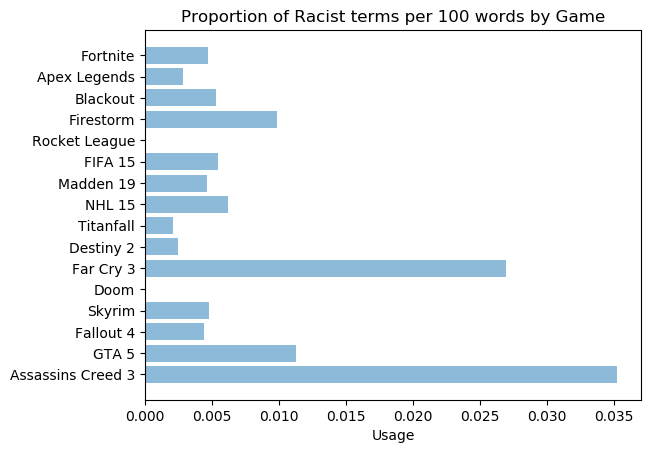

In [225]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#Titles of the games
objects = ('Assassins Creed 3','GTA 5','Fallout 4',
          'Skyrim', 'Doom', 'Far Cry 3',
          'Destiny 2', 'Titanfall', 'NHL 15', 'Madden 19',
          'FIFA 15', 'Rocket League', 'Firestorm', 'Blackout',
          'Apex Legends', 'Fortnite')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for racist terms by games
performance = [(153/434015)*100, (33/293109)*100, (26/589882)*100,
                       (23/481379)*100, (0/40901)*100, (54/200311)*100,
                       (7/286274)*100, (6/285206)*100, (2/32259)*100,
                       (2/42898)*100, (5/91451)*100, (0/22990)*100,
                       (6/61083)*100, (7/132100)*100,(3/106763)*100,
                       (9/190001)*100]
#Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Proportion of Racist terms per 100 words by Game')
 
plt.show()

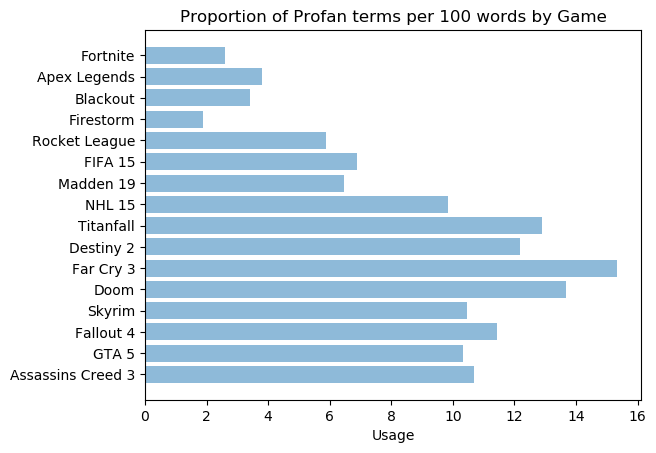

In [226]:
import matplotlib.pyplot as plt
 
#Titles of the games
objects = ('Assassins Creed 3','GTA 5','Fallout 4',
          'Skyrim', 'Doom', 'Far Cry 3',
          'Destiny 2', 'Titanfall', 'NHL 15', 'Madden 19',
          'FIFA 15', 'Rocket League', 'Firestorm', 'Blackout',
          'Apex Legends', 'Fortnite')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for profane comments per 100 by genre
performance = [(2669/24999)*100, (1788/17333)*100, (2855/24994)*100,
                       (2616/25000)*100, (369/2697)*100, (2009/13095)*100,
                       (2158/17709)*100, (1651/12811)*100, (178/1811)*100,
                       (179/2768)*100, (437/6347)*100, (110/1876)*100,
                       (95/5011)*100, (329/9685)*100,(304/8014)*100,
                       (410/15699)*100]

 #Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title("Proportion of Profane comments per 100 comments by Game")
 
plt.show()

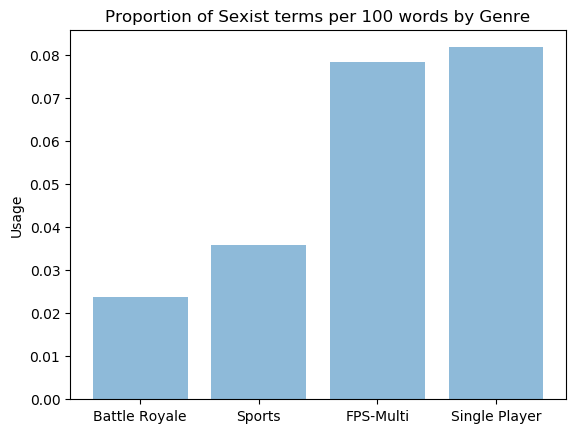

In [212]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
#Titles of the genres
objects = ('Battle Royale', 'Sports', 'FPS-Multi', 'Single Player')
y_pos = np.arange(len(objects))

#Inputed results from the calculated values above for sexist terms by genre
performance = [(116/489947)*100,(68/189598)*100,(637/812692)*100,(1469/1798385)*100]
 
#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Sexist terms per 100 words by Genre')
 
plt.show()

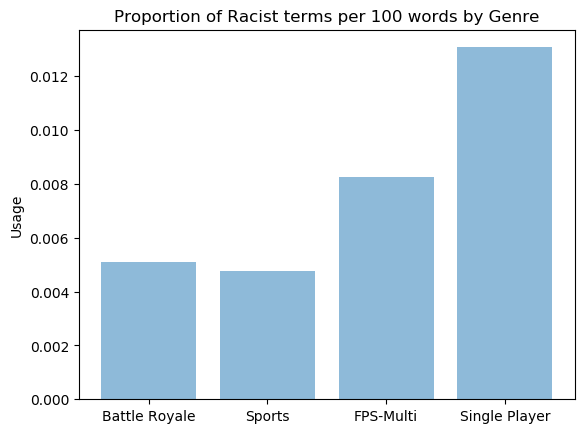

In [213]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
#Titles of the genres
objects = ('Battle Royale', 'Sports', 'FPS-Multi', 'Single Player')
y_pos = np.arange(len(objects))

#Inputed results from the calculated values above for racist terms by games
performance = [(25/489947)*100,(9/189598)*100,(67/812692)*100,(235/1798385)*100]
 
#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Racist terms per 100 words by Genre')
 
plt.show()

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the genres
objects = ('Battle Royale', 'Sports', 'FPS-Multi', 'Single Player')
y_pos = np.arange(len(objects))

#Inputed results from the calculated values above for profane comments by genre
performance = [(1138/38409)*100,(904/12802)*100,(6187/46312)*100,(9928/92326)*100]

#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Profane comments per 100 comments by Genre')
 
plt.show()

<Figure size 640x480 with 1 Axes>